<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Rabota_s_priznakami_i_postroenie_modelej/Logisticheskaya_regressiya_SVM/DZ_Kondrstev_log_regression_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к занятию «Классификация: Логистическая регрессия и SVM»

## **Задание**

**Преподаватель:** Наталья Баданина, Юлия Пономарева

**Цель:** изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.



## **Описание задания:**

В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле `adult.csv`, который можно найти в материалах к занятию или скачать [с сайта.](https://www.cs.toronto.edu/~delve/data/adult/desc.html)

* Целевая переменная – уровень дохода `income`, который принимает два значения `<=50K` и `>50K`, поэтому классификация бинарная.

* Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д.

* Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции `Python3` для анализа датасета (`describe`, `unique` и т.д) или прочитать информацию [по ссылке.](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html)

* Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

## **Описание Этапов работы:**

1. Получите данные и загрузите их в рабочую среду. (`Jupyter Notebook` или другую)
2. Проведите первичный анализ.
3. Проверьте данные на пропуски. Удалите в случае обнаружения. Предложите альтернативный способ работы с пропусками
4. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
5. Преобразуйте категориальные признаки.
6. Разделите выборку на обучающее и тестовое подмножество. `80%` данных оставить на обучающее множество, `20%` на тестовое.
7. Обучите модели логистической регрессии и опорных векторов на обучающем множестве.
8. Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию `score`.
9. Сформулируйте выводы по проделанной работе.
* Кратко опишите какие преобразования были сделаны с данными.
* Сравните точность двух моделей.
* Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
* Что по вашему мнению нужно сделать, чтобы улучшить результат ?




**Рекомендации к выполнению:**

* Текст оформляйте в отдельной ячейке `Jupyter Notebook/Google Colab` в формате `markdown`.
* У графиков должен быть заголовок, подписи осей, легенда (опционально).
* Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.
* Для получение зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.

## **Решение задания:**

### 1. Загрузка данных и первичный анализ:

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
from sklearn.metrics import accuracy_score
import scipy.sparse as sp

In [39]:
# Загрузка данных
data = pd.read_csv("https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Rabota_s_priznakami_i_postroenie_modelej/Logisticheskaya_regressiya_SVM/adult.csv")

In [40]:
# Первичный анализ данных
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Описание атрибутов их базы данных:

Непрерывные признаки:

1. Возраст (age) - это количественное значение, представляющее возраст человека.
2. Весовой коэффициент семьи (fnlwgt) - это числовое значение, представляющее средний вес семьи для определения, насколько репрезентативна выборка в обследовании.
3. Прибыль от капитала (capital-gain) - это числовое значение, представляющее прибыль, полученную от продажи активов.
4. Потери капитала (capital-loss) - это числовое значение, представляющее убытки, понесенные от продажи активов.
5. Количество рабочих часов в неделю (hours-per-week) - это количественное значение, представляющее количество часов, которые человек работает в неделю.

Категориальные признаки:

1. Класс работы (workclass) - это категориальное значение, указывающее на тип работы, включая частный сектор, государственный сектор и самозанятых.
2. Уровень образования (education) - это категориальное значение, описывающее уровень образования, начиная от школы до докторской степени.
3. Количество лет образования (educational-num) - это числовое значение, представляющее количество лет образования, завершенных человеком.
4. Семейное положение (marital-status) - это категориальное значение, указывающее на статус отношений человека, такой как женат/замужем или разведен.
5. Род занятий (occupation) - это категориальное значение, описывающее профессию или специализацию человека.
6. Отношение к респонденту (relationship) - это категориальное значение, указывающее на отношение данного человека к респонденту, например, жена, собственный ребенок и т. д.
7. Раса (race) - это категориальное значение, описывающее принадлежность к определенной расовой группе.
8. Пол (gender) - это категориальное значение, обозначающее пол человека как мужской или женский.
9. Страна рождения (native-country) - это категориальное значение, указывающее на страну, в которой человек родился.
10. Целевая переменная – уровень дохода (income), который принимает два значения <=50K и >50K.

Теперь описание соответствует фактическим названиям столбцов в вашем DataFrame.

Более подробное описание значений признаков [см.](https://colab.research.google.com/drive/1sFzIdSsHEr-eoDqpUWNaJW56_H1ayypS?usp=sharing)

### 2. Проверка наличия пропусков и обработка:

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Общая информация о датасете:
   - Датасет содержит 48842 записи (строки) и 15 столбцов (признаков).
   - Практически все признаки имеют полное количество непропущенных значений (non-null count равен общему количеству записей для каждого столбца).
   - Информация о типах данных:
     - 6 признаков имеют тип int64 (целочисленные значения).
     - 9 признаков имеют тип object (возможно, содержат категориальные данные или строки).

Исходя из информации о типах данных и количестве непустых значений в каждом столбце, можно сделать вывод, что столбцы с типом `int64` не содержат пропущенных значений (Non-Null Count равен общему числу записей в наборе данных). Это значит, что все значения в столбцах `age`, `fnlwgt`, `educational-num`, `capital-gain`, `capital-loss` и `hours-per-week` являются непустыми.

В то же время, столбцы типа `object`, такие как `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `gender`, `native-country` и `income`, могут содержать как категориальные данные, так и пропущенные значения, поскольку их числа 'Non-Null Count' и 'RangeIndex' равны, что может сигнализировать о наличии пропущенных значений в виде специальных значений (например, "?") или пустых строк.

Посмотрим информацию о пропущенных значениях (если они есть) и список уникальных значений в столбце типа object.

In [42]:
for column in data.select_dtypes(include=['object']).columns:
    nan_values = data[column].isnull().sum()  # Подсчет числа пропущенных значений (NaN)
    unique_values = data[column].unique()     # Получение уникальных значений в столбце

    print(f"В столбце '{column}' есть {nan_values} пропущенных значений (NaN)")
    print(f"Уникальные значения в столбце '{column}': {unique_values}\n")


В столбце 'workclass' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'workclass': ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

В столбце 'education' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'education': ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

В столбце 'marital-status' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'marital-status': ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

В столбце 'occupation' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'occupation': ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv

В результате выполнения кода было обнаружено:

1. Что в наборе данных отсутствуют пустые значения в столбцах типа 'object'
2. Все уникальные значения соответствуют описанию базы данных
3. было обнаружено, что у некоторых столбцов в наборе данных есть пропущенные значения в виде символа "?".



In [43]:
# Идентификация и замена символа "?" на пропуски (NaN):
import numpy as np
data.replace('?', np.nan, inplace=True)

In [44]:
# Посмотрим на пропуски
data.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [45]:
# Удалим строки с пропущенными значениями
data.dropna(inplace=True)

In [46]:
# Смотрим, что получилось
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


Смотрим на описание базы:
```
Данная база данных содержит информацию о взрослых людях, полученную из переписи
населения 1994 года. Были применены следующие критерии для отбора относительно
"чистых" записей: возраст старше 16 лет, валовой доход семьи превышает 100 долларов,
весовой коэффициент семейства больше 1 и количество рабочих часов больше нуля.
Всего было извлечено 48 842 записи.
Если исключить записи с неизвестными значениями, остается 45 222 записи.
```
У нас осталось ровно 45 222 записи. На этом заканчиваем работу с пропусками.


### 3. Визуализация и анализ данных:

Посмотрим статистики

In [47]:
# Разделение на две группы по доходу
income_below_50k = data[data['income'] == '<=50K']
income_above_50k = data[data['income'] == '>50K']

# Статистики для дохода <=50K
stats_below_50k = income_below_50k.describe()

# Статистики для дохода >50K
stats_above_50k = income_above_50k.describe()

In [48]:
# Вывод статистик
stats_below_50k

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,34014.000000,3.401400e+04,34014.000000,34014.000000,34014.000000,34014.000000
mean,36.749427,1.901752e+05,9.630770,149.023402,54.032428,39.372023
std,13.564683,1.066537e+05,2.420402,927.447387,312.220461,11.974127
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,26.000000,1.169680e+05,9.000000,0.000000,0.000000,37.000000
50%,34.000000,1.789525e+05,9.000000,0.000000,0.000000,40.000000
75%,46.000000,2.394048e+05,10.000000,0.000000,0.000000,40.000000
max,90.000000,1.490400e+06,16.000000,41310.000000,4356.000000,99.000000


In [49]:
stats_above_50k

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,11208.000000,1.120800e+04,11208.000000,11208.000000,11208.000000,11208.000000
mean,44.006067,1.883980e+05,11.598501,3991.791667,193.487063,45.690489
std,10.340502,1.024921e+05,2.367451,14616.543746,592.642319,10.797764
min,19.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,36.000000,1.188590e+05,10.000000,0.000000,0.000000,40.000000
50%,43.000000,1.767755e+05,12.000000,0.000000,0.000000,40.000000
75%,51.000000,2.335110e+05,13.000000,0.000000,0.000000,50.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,3683.000000,99.000000


Исходя из статистик для двух групп - с доходом <=50K и >50K, можно сделать следующие выводы по каждому признаку:

1. Возраст (Age):
   - Для группы с доходом <=50K: средний возраст равен примерно 36.75 лет, для группы >50K - примерно 44.01 год. Это говорит о том, что в группе с более высоким доходом средний возраст выше.
   - Для обеих групп существуют различные диапазоны возрастов, что отражается в максимальных и минимальных значениях.

2. Образование (Educational-num):
   - Для группы с доходом <=50K среднее значение образовательного уровня равно примерно 9.63, а для группы >50K - 11.60. Это указывает на более высокий уровень образования в группе с более высоким доходом.

3. Капиталовложения (Capital-gain и Capital-loss):
   - Для группы с доходом >50K среднее значение капитала заработка (capital-gain) гораздо выше, чем для группы <=50K. Это может свидетельствовать о большем количестве дополнительных источников дохода у людей с доходом >50K.
   - Также, среднее значение капитала потерь (capital-loss) выше для группы >50K, что может означать больший уровень инвестиций.

4. Часы работы в неделю (Hours-per-week):
   - Для группы с доходом >50K среднее количество отработанных часов в неделю (45.69) превышает среднее для группы <=50K (39.37). Это может указывать на то, что люди с более высоким доходом часто работают дольше.

Посмотрим визуально

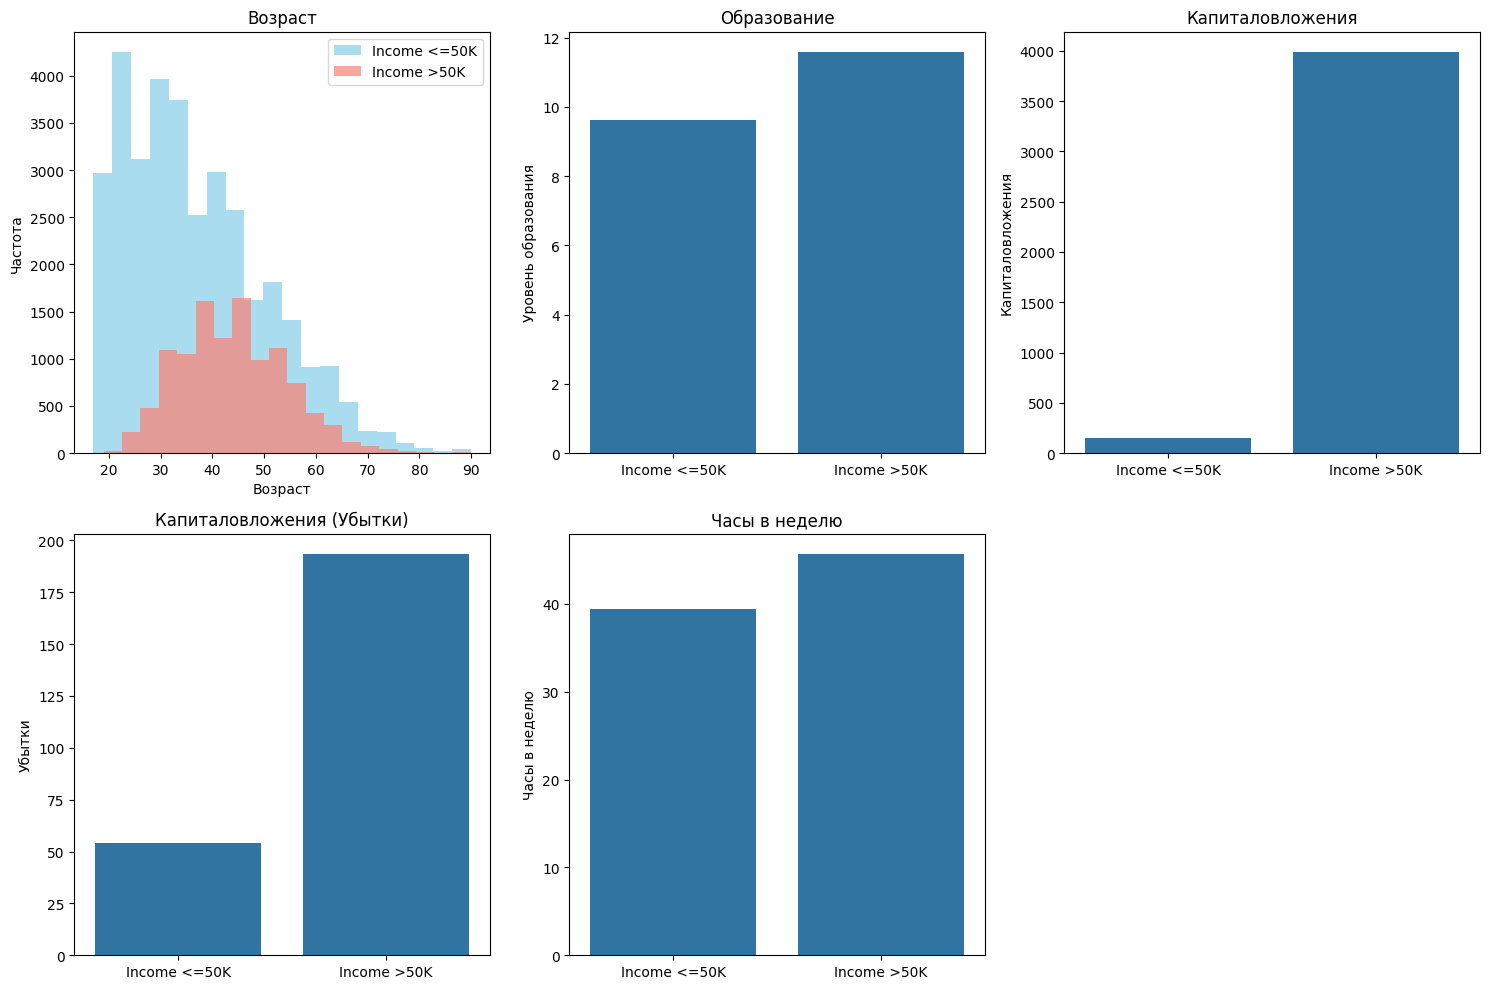

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


# Создаем новую фигуру и оси
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Гистограмма для возраста
axes[0, 0].hist(income_below_50k['age'], bins=20, color='skyblue', alpha=0.7, label='Income <=50K')
axes[0, 0].hist(income_above_50k['age'], bins=20, color='salmon', alpha=0.7, label='Income >50K')
axes[0, 0].set_title('Возраст')
axes[0, 0].set_xlabel('Возраст')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].legend()

# График различий для образования
sns.barplot(x=['Income <=50K', 'Income >50K'], y=[income_below_50k['educational-num'].mean(), income_above_50k['educational-num'].mean()], ax=axes[0, 1])
axes[0, 1].set_title('Образование')
axes[0, 1].set_ylabel('Уровень образования')

# График различий для капиталовложений
sns.barplot(x=['Income <=50K', 'Income >50K'], y=[income_below_50k['capital-gain'].mean(), income_above_50k['capital-gain'].mean()], ax=axes[0, 2])
axes[0, 2].set_title('Капиталовложения')
axes[0, 2].set_ylabel('Капиталовложения')

# График различий для убытков
sns.barplot(x=['Income <=50K', 'Income >50K'], y=[income_below_50k['capital-loss'].mean(), income_above_50k['capital-loss'].mean()], ax=axes[1, 0])
axes[1, 0].set_title('Капиталовложения (Убытки)')
axes[1, 0].set_ylabel('Убытки')

# График различий для часов в неделю
sns.barplot(x=['Income <=50K', 'Income >50K'], y=[income_below_50k['hours-per-week'].mean(), income_above_50k['hours-per-week'].mean()], ax=axes[1, 1])
axes[1, 1].set_title('Часы в неделю')
axes[1, 1].set_ylabel('Часы в неделю')

# Убираем пустое окно
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

Для определения статистически значимых различий в средних значениях между двумя группами можно воспользоваться статистическими тестами класса t-теста, например, t-критерием Стьюдента.

In [51]:
import scipy.stats as stats

# Создаем список признаков
features = ['educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for feature in features:
    # Проводим t-тест для сравнения средних значений между двумя группами
    t_stat, p_value = stats.ttest_ind(income_below_50k[feature], income_above_50k[feature])

    # Печатаем результат теста
    if p_value < 0.05:
        print(f"Существуют статистически значимые различия в среднем значении {feature} между группами Income <=50K и Income >50K")
    else:
        print(f"Нет статистически значимых различий в среднем значении {feature} между группами Income <=50K и Income >50K")

    # Пустая строка
    print()

Существуют статистически значимые различия в среднем значении educational-num между группами Income <=50K и Income >50K

Существуют статистически значимые различия в среднем значении capital-gain между группами Income <=50K и Income >50K

Существуют статистически значимые различия в среднем значении capital-loss между группами Income <=50K и Income >50K

Существуют статистически значимые различия в среднем значении hours-per-week между группами Income <=50K и Income >50K



Посмотрим есть ли корреляция между признаками

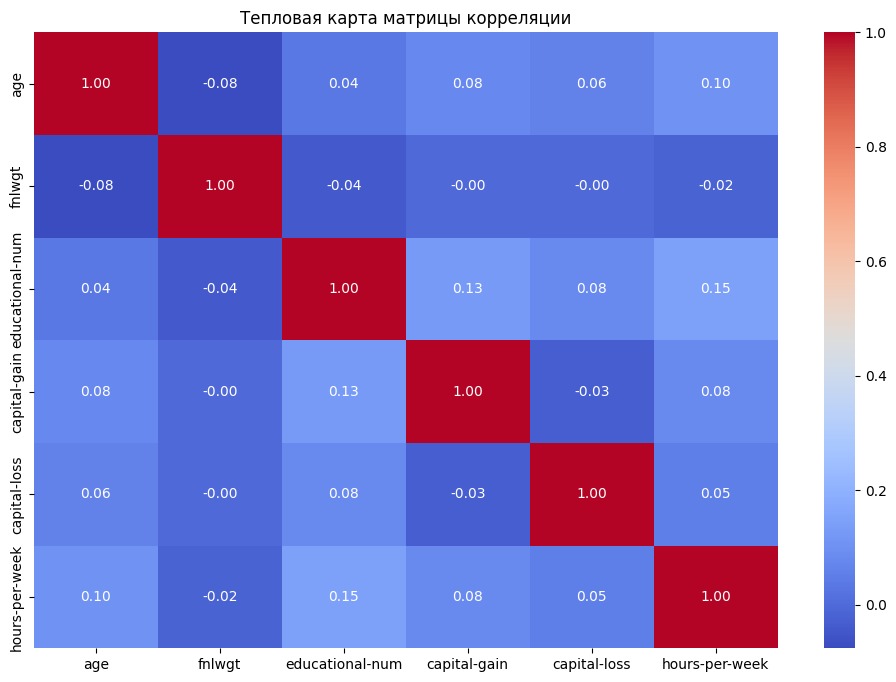

In [52]:
# Выбираем только числовые признаки для анализа корреляции
numeric_features = data.select_dtypes(include=['int64', 'float64'])

# Вычисляем матрицу корреляции
correlation_matrix = numeric_features.corr()

# Создаем тепловую карту матрицы корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта матрицы корреляции')
plt.show()

Из матрицы корреляции числовых признаков можно сделать следующие выводы:

1. Возраст (age) имеет положительную корреляцию с количеством отработанных часов в неделю (hours-per-week) и уровнем образования (educational-num). Это может означать, что чем старше человек, тем вероятнее, что он будет работать больше часов и иметь более высокий уровень образования.

2. Уровень образования (educational-num) также имеет положительную корреляцию с возможным доходом от капитала (capital-gain), что может свидетельствовать о том, что люди с более высоким образованием имеют больше возможностей для заработка посредством капитала.

In [53]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### 5. Преобразование категориальных признаков:

In [54]:
# Преобразование категориальных признаков в числовые с помощью One-Hot Encoding
data = pd.get_dummies(data, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], drop_first=True)


### 4. Разделение выборки на обучающее и тестовое подмножество:

In [55]:
# Разделение набора данных на обучающий и тестовый
X = data.drop('income', axis=1)
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
8605,29,263786,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
28547,39,99270,13,0,0,50,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
33927,41,237452,13,0,0,15,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
14437,21,109199,10,0,0,15,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
41839,58,206532,9,0,0,50,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12183,39,497525,6,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48310,36,114719,14,0,0,50,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
41203,53,38795,5,0,0,40,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
930,57,186361,11,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


### 6. Обучение моделей логистической регрессии и метода опорных векторов:

In [57]:
# Обучение модели логистической регрессии с увеличенным числом итераций
logreg = LogisticRegression(max_iter=1000)  # Указание большего значения для max_iter
logreg.fit(X_train, y_train)

# Обучение модели метода опорных векторов
svm = SVC()
svm.fit(X_train, y_train)
# Предсказание на тестовом наборе для обеих моделей
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)

### 7. Оценка точности моделей на тестовом множестве:

In [58]:
# Оценка точности моделей
print("Accuracy of Logistic Regression model:", accuracy_score(y_test, y_pred_logreg))
print("Accuracy of SVM model:", accuracy_score(y_test, y_pred_svm))


Accuracy of Logistic Regression model: 0.7954671088999448
Accuracy of SVM model: 0.7948037589828635


Точность модели логистической регрессии составляет 0.7955, в то время как точность модели SVM равна 0.7948. Это означает, что модель логистической регрессии показала чуть выше точность прогнозирования на тестовом наборе данных по сравнению с моделью SVM.

Попробуем обучить модель с Масштабированными данными (StandartScaler) - для признаков с непрерывными значениями

In [59]:
# Определите столбцы с непрерывными признаками
continuous_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Создайте объект StandardScaler
scaler = StandardScaler()

# Обучите StandardScaler на обучающих данных и преобразуйте оба набора данных
X_train_continuous = X_train[continuous_columns]
X_test_continuous = X_test[continuous_columns]

scaler.fit(X_train_continuous)
X_train_continuous_scaled = scaler.transform(X_train_continuous)
X_test_continuous_scaled = scaler.transform(X_test_continuous)

In [60]:
# Объедините преобразованные непрерывные признаки с категориальными с использованием np.concatenate
X_train_scaled = np.concatenate([X_train_continuous_scaled, X_train.drop(continuous_columns, axis=1)], axis=1)
X_test_scaled = np.concatenate([X_test_continuous_scaled, X_test.drop(continuous_columns, axis=1)], axis=1)

In [61]:
# Обучение модели логистической регрессии с увеличенным числом итераций
logreg = LogisticRegression(max_iter=1000)  # Указание большего значения для max_iter
logreg.fit(X_train_scaled, y_train)

# Обучение модели метода опорных векторов
svm = SVC()
svm.fit(X_train_scaled, y_train)

# Предсказание на тестовом наборе для обеих моделей
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)

# Оценка точности моделей
print("Accuracy of Logistic Regression model:", accuracy_score(y_test, y_pred_logreg))
print("Accuracy of SVM model:", accuracy_score(y_test, y_pred_svm))

Accuracy of Logistic Regression model: 0.8518518518518519
Accuracy of SVM model: 0.8593698175787728


Исходя из результатов, можно сделать вывод, что после масштабирования непрерывных признаков обе модели (логистическая регрессия и SVM) показали улучшение производительности по сравнению с исходными моделями без масштабирования. Модель SVM показала немного лучшую точность прогнозирования на тестовом наборе данных. Однако, для окончательного выбора модели рекомендуется провести более детальный анализ и учет других метрик оценки производительности.

In [62]:
# Обучение модели метода опорных векторов с полиномиальным ядром и подбором оптимальеого значения параметра `degree`,
# начиная от квадратичной функции и до более высоких степеней (до седьмой)

from sklearn.model_selection import GridSearchCV

# Задаем параметры для перебора
param_grid = {'degree': [2, 3, 4, 5, 6, 7]}

# Создаем объект модели SVM
svm = SVC(kernel='poly')

# Используем GridSearchCV для перебора и оценки
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Получаем лучший параметр degree
best_degree = grid_search.best_params_['degree']
print("Best value for degree:", best_degree)

# Обучаем SVM с лучшим параметром degree
best_svm = SVC(kernel='poly', degree=best_degree)
best_svm.fit(X_train_scaled, y_train)

# Предсказание на тестовом наборе
y_pred_best_svm = best_svm.predict(X_test_scaled)

# Оценка точности модели с лучшим параметром degree
print("Accuracy of SVM model with best polynomial kernel (degree={}):".format(best_degree), accuracy_score(y_test, y_pred_best_svm))


Best value for degree: 3
Accuracy of SVM model with best polynomial kernel (degree=3): 0.8553897180762853


Точность модели SVM уменьшилась с 0.8594 до 0.8554 после подбора оптимального значения параметра `degree`.

Исходя из результатов, можно сказать, что модель SVM с оптимальным полиномиальным ядром имеет точность немного ниже, чем у модели без подбора параметров.

Проведем кросс-валидацию для нескольких моделей (логистическая регрессия, SVM, случайный лес и SVM с полиномиальным ядром) и оценки их производительности на обучающем наборе данных.

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Инициализация моделей
log_reg = LogisticRegression(max_iter=1000)
svm = SVC()
random_forest = RandomForestClassifier()
svm_poly = SVC(kernel='poly', degree=3)

# Обучение и кросс-валидация для Logistic Regression
log_reg_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
log_reg_mean_score = log_reg_scores.mean()

# Обучение и кросс-валидация для SVM
svm_scores = cross_val_score(svm, X_train_scaled, y_train, cv=5)
svm_mean_score = svm_scores.mean()

# Обучение и кросс-валидация для RandomForest
rf_scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=5)
rf_mean_score = rf_scores.mean()

# Обучение и кросс-валидация для SVC с полиномиальным ядром
svm_poly_scores = cross_val_score(svm_poly, X_train_scaled, y_train, cv=5)
svm_poly_mean_score = svm_poly_scores.mean()

# Вывод результатов кросс-валидации для каждой модели
print("Mean cross-validation score of Logistic Regression: ", log_reg_mean_score)
print("Mean cross-validation score of SVM: ", svm_mean_score)
print("Mean cross-validation score of RandomForest: ", rf_mean_score)
print("Mean cross-validation score of SVC with polynomial kernel (degree=3): ", svm_poly_mean_score)


Mean cross-validation score of Logistic Regression:  0.8473339094285158
Mean cross-validation score of SVM:  0.851120749626665
Mean cross-validation score of RandomForest:  0.8502638615262779
Mean cross-validation score of SVC with polynomial kernel (degree=3):  0.8498216091469246


### 8. Выводы:

1. Модель SVM показывает немного лучшую среднюю точность по сравнению с логистической регрессией, случайным лесом и SVM с полиномиальным ядром.

2. Логистическая регрессия имеет среднюю точность кросс-валидации ниже, чем у модели SVM, но при этом близкую к результатам случайного леса и SVM с полиномиальным ядром.

3. В данном случае наиболее производительной является модель SVM, что может быть связано с эффективным учетом зависимостей между признаками в данных.

4. Случайный лес и SVM с полиномиальным ядром имеют среднюю точность кросс-валидации близкую к результатам модели SVM, но немного ниже.

Исходя из результатов кросс-валидации, модель SVM без настройки параметров демонстрирует лучшую производительность по сравнению с другими рассмотренными моделями.